# Contents

#### 1. Import Libraries
#### 2. Loading the Dataset
#### 3. Initial Data Exploration
#### 4. Checking for Missing Values
#### 5. Checking for duplicates, mixed-type data, and performing data transformations
#### 6. Addressing errors and inconsistencies
#### 7. Checking the Outliers
#### 8. Exporting the Dataset

### 1. Import Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading the dataset

In [2]:
#create a path variable
path = r'C:\Users\Sreelakshmi\Desktop\Achievement6'

In [3]:
#import the dataset
df_covid = pd.read_csv(os.path.join(path,'Project','Data', 'Original Data', 'Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv'), index_col = False)
df_covid.shape

(621000, 14)

In [4]:
#checking the dataset
print(df_covid.info())
df_covid.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621000 entries, 0 to 620999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          621000 non-null  object 
 1   Start Date          621000 non-null  object 
 2   End Date            621000 non-null  object 
 3   Group               621000 non-null  object 
 4   Year                608580 non-null  float64
 5   Month               558900 non-null  float64
 6   State               621000 non-null  object 
 7   Condition Group     621000 non-null  object 
 8   Condition           621000 non-null  object 
 9   ICD10_codes         621000 non-null  object 
 10  Age Group           621000 non-null  object 
 11  COVID-19 Deaths     437551 non-null  float64
 12  Number of Mentions  443423 non-null  float64
 13  Flag                183449 non-null  object 
dtypes: float64(4), object(10)
memory usage: 66.3+ MB
None


,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,NaN
1,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,NaN
2,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,NaN
3,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,NaN
4,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,NaN


### 3. Initial Data Exploration

#### The dataset contains following types of variables
#### 1. Quantitative Discrete : Year, Month, COVID-19 Deaths, Number of Mentions
#### 2. Qualitative Nominal   : State
#### 3. Qualitative Ordinal   : Data as of, Start Date, End Date,Condition Group, Condition, ICD10_codes, Age Group, Flag


### Finding the basic statistics of numeric variables 

In [5]:
# To check the basic statistics of the dataset
df_covid.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,608580.000000,558900.000000,4.375510e+05,4.434230e+05
mean,2021.408163,6.200000,1.201179e+02,1.293348e+02
std,1.086436,3.350625,2.980201e+03,3.203936e+03
min,2020.000000,1.000000,0.000000e+00,0.000000e+00
25%,2020.000000,3.000000,0.000000e+00,0.000000e+00
50%,2021.000000,6.000000,0.000000e+00,0.000000e+00
75%,2022.000000,9.000000,1.800000e+01,1.900000e+01
max,2023.000000,12.000000,1.146242e+06,1.146242e+06


### According to the above statistics, values in the Year and Month columns are seems to be accurate. On the other hand values in the COVID-19 Deaths and Number of Mentions needs to the rechecked, because the data contains more number of zeros and high maximum values.

### Checking the numerical columns using a histogram


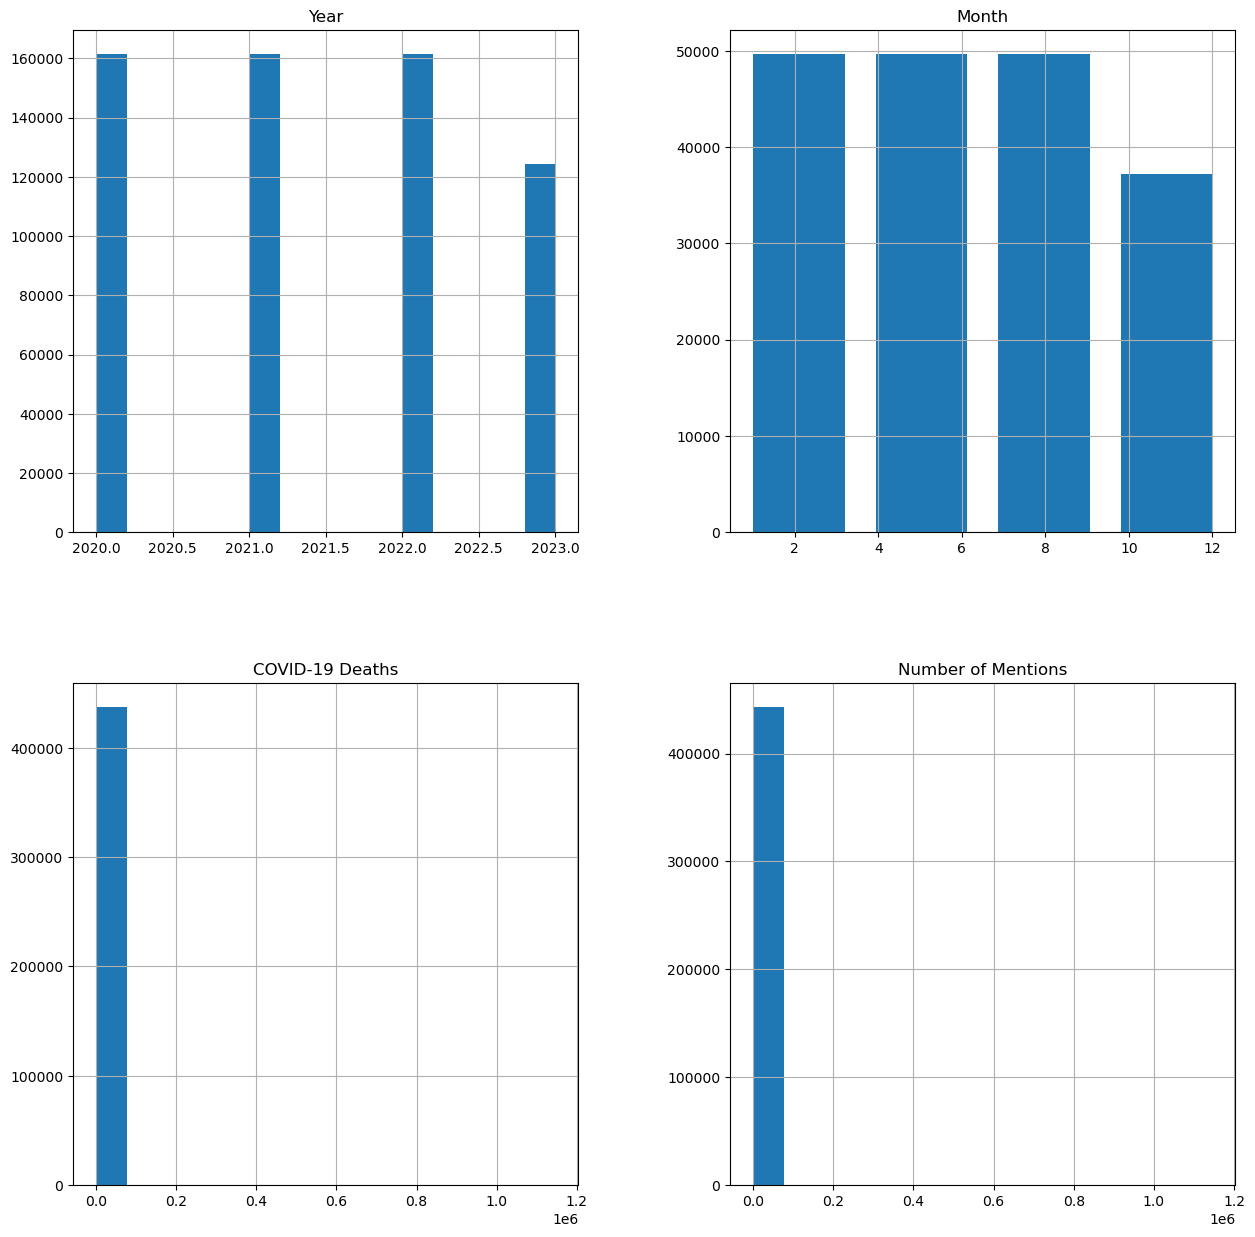

In [6]:
#Plotting a histogram for all numeric variables
df_covid.hist(bins=15,figsize=(15,15))
plt.show()

### Plotting histograms for each numeric columns to identify its skewness and outliers

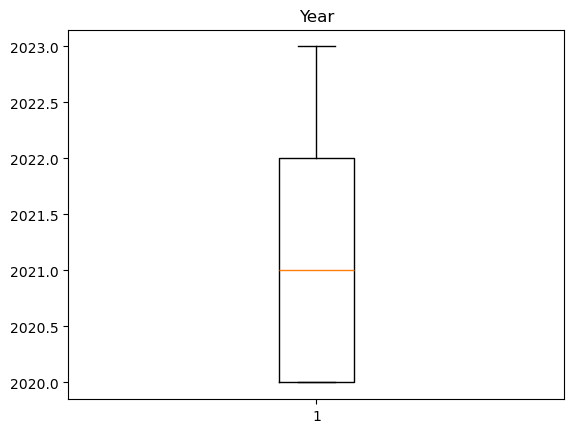

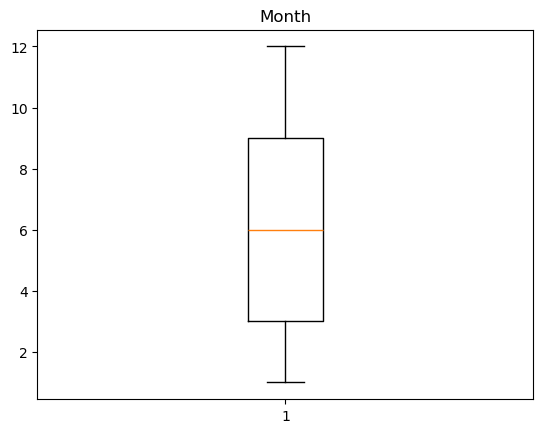

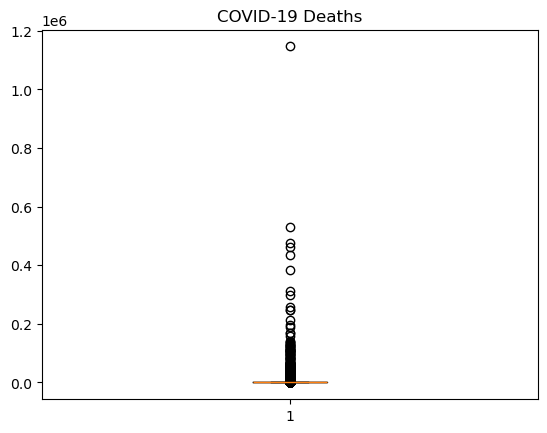

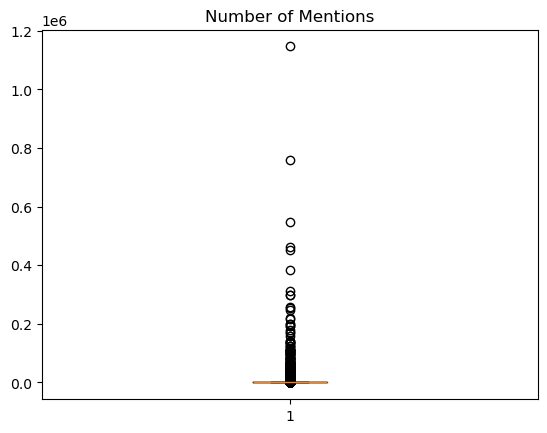

In [7]:
# ploting boxplot for each numerical columns
plt.boxplot(df_covid['Year'].dropna())
plt.title('Year')
plt.show()

plt.boxplot(df_covid['Month'].dropna())
plt.title('Month')
plt.show()

plt.boxplot(df_covid['COVID-19 Deaths'].dropna())
plt.title('COVID-19 Deaths')
plt.show()

plt.boxplot(df_covid['Number of Mentions'].dropna())
plt.title('Number of Mentions')
plt.show()

#### Both COVID-19 Deaths and Number of Mentions are highly right-skewed with a high number of outliers.
The Year and Month distributions appear pretty much as expected.

### Consistency check for categorical variables

In [8]:
# Perform frequency counts on the categorical variables
print(df_covid['State'].value_counts(dropna=False))

print(df_covid['Condition Group'].value_counts(dropna=False))

print(df_covid['Condition'].value_counts(dropna=False))

print(df_covid['ICD10_codes'].value_counts(dropna=False))

print(df_covid['Age Group'].value_counts(dropna=False))

print(df_covid['Flag'].value_counts(dropna=False))

State
United States           11500
Pennsylvania            11500
Nevada                  11500
New Hampshire           11500
New Jersey              11500
New Mexico              11500
New York                11500
New York City           11500
North Carolina          11500
North Dakota            11500
Ohio                    11500
Oklahoma                11500
Oregon                  11500
Rhode Island            11500
Alabama                 11500
South Carolina          11500
South Dakota            11500
Tennessee               11500
Texas                   11500
Utah                    11500
Vermont                 11500
Virginia                11500
Washington              11500
West Virginia           11500
Wisconsin               11500
Wyoming                 11500
Nebraska                11500
Montana                 11500
Missouri                11500
Mississippi             11500
Alaska                  11500
Arizona                 11500
Arkansas                11500
Cali

### There is not much issues found in the consistency checks,because the records are distributed uniformily across states, condition groups, conditions, ICD10 codes, and age groups. The Flag column contains mostly missing values, which is okay because the flag indicates data was suppressed for confidentiality.

## 3. Checking for Missing values

In [9]:
#check the data for missing values
df_covid.isnull().sum()

Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                   12420
Month                  62100
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       183449
Number of Mentions    177577
Flag                  437551
dtype: int64

### The following columns have missing values:
##### Year  - 12420
##### Month - 62100
##### COVID-19 Deaths - 183449
##### Number of Mentions - 177577
##### Flag - 437551

In [10]:
# extracting the subset which contains null values in year and month column
df_covid_null_year = df_covid[df_covid['Year'].isnull() == True]
df_covid_null_month = df_covid[df_covid['Month'].isnull() == True]

In [11]:
# finding the Group in which null values are present
print(df_covid_null_year['Group'].value_counts(dropna = False))
df_covid_null_month['Group'].value_counts(dropna = False)

Group
By Total    12420
Name: count, dtype: int64


Group
By Year     49680
By Total    12420
Name: count, dtype: int64

#### From the above information we can infer that, null values in Year and Month columns are present only in the Groups By Year and By Total, which may be an aggregation of data. Removing these rows of aggregated data will address the missing values in both the Year and Month columns, as well as provide more accurate descriptive statistics of the dataset

In [12]:
# Separate the dataframe into two parts, one that includes Group only "By Month" and one that includes Group "By Total" and "By Year"
df_covid_month = df_covid[df_covid['Group'] == 'By Month']
df_covid_total_year = df_covid[df_covid['Group'].isin(['By Total', 'By Year'])]

In [13]:
# Verify the separation
df_covid_month.info()
df_covid_total_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558900 entries, 62100 to 620999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          558900 non-null  object 
 1   Start Date          558900 non-null  object 
 2   End Date            558900 non-null  object 
 3   Group               558900 non-null  object 
 4   Year                558900 non-null  float64
 5   Month               558900 non-null  float64
 6   State               558900 non-null  object 
 7   Condition Group     558900 non-null  object 
 8   Condition           558900 non-null  object 
 9   ICD10_codes         558900 non-null  object 
 10  Age Group           558900 non-null  object 
 11  COVID-19 Deaths     388500 non-null  float64
 12  Number of Mentions  393720 non-null  float64
 13  Flag                170400 non-null  object 
dtypes: float64(4), object(10)
memory usage: 64.0+ MB
<class 'pandas.core.frame.DataFrame'

In [14]:
# crosschecking the rows
len(df_covid)

621000

In [15]:
len(df_covid_month) + len(df_covid_total_year)

621000

#### Rechecking the number of missing values in the separated "df_covid_month" dataframe

In [16]:
#checking for missing values in df_covid_month
df_covid_month.isnull().sum()

Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                       0
Month                      0
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       170400
Number of Mentions    165180
Flag                  388500
dtype: int64

In [17]:
df_covid_missing_val = df_covid_month[df_covid_month['COVID-19 Deaths'].isnull() == True]
df_covid_missing_val.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
72458,09/24/2023,09/01/2020,09/30/2020,By Month,2020.0,9.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,NaN,One or more data cells have counts between 1-9...
72463,09/24/2023,02/01/2021,02/28/2021,By Month,2021.0,2.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,NaN,One or more data cells have counts between 1-9...
72465,09/24/2023,04/01/2021,04/30/2021,By Month,2021.0,4.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,NaN,One or more data cells have counts between 1-9...
72467,09/24/2023,06/01/2021,06/30/2021,By Month,2021.0,6.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,NaN,One or more data cells have counts between 1-9...
72468,09/24/2023,07/01/2021,07/31/2021,By Month,2021.0,7.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,NaN,One or more data cells have counts between 1-9...


##### The missing values in the COVID-19 Deaths and Number of Mentions columns appear to correspond with the Flag column value of "One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.".

##### Therefore,impute a random number between 1 and 9 into the missing values of COVID-19 Deaths and Number of Mentions when the flag indicator is present.

In [18]:
# Identify rows with suppression flag
suppression_message = "One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards."
suppressed_rows = df_covid_month[df_covid_month['Flag'] == suppression_message]

In [19]:
# Define a function to generate random integers between 1 and 9
def random_1_to_9(series):
    return series.apply(lambda x: np.random.randint(1, 10) if pd.isnull(x) else x)

In [20]:
# Impute only the missing values in COVID-19 Deaths and Number of Mentions with a random number between 1-9
df_covid_month.loc[suppressed_rows.index, 'COVID-19 Deaths'] = random_1_to_9(suppressed_rows['COVID-19 Deaths'])
df_covid_month.loc[suppressed_rows.index, 'Number of Mentions'] = random_1_to_9(suppressed_rows['Number of Mentions'])

In [21]:
# Verify the changes by rechecking the descriptive statistics
df_covid_month.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,558900.000000,558900.000000,558900.000000,558900.000000
mean,2021.400000,6.200000,32.243892,35.049941
std,1.083206,3.350625,483.282287,518.791762
min,2020.000000,1.000000,0.000000,0.000000
25%,2020.000000,3.000000,0.000000,0.000000
50%,2021.000000,6.000000,1.000000,1.000000
75%,2022.000000,9.000000,8.000000,8.000000
max,2023.000000,12.000000,105566.000000,105566.000000


In [22]:
# Verify the changes by checking value counts
print(df_covid_month['COVID-19 Deaths'].value_counts().sort_index())
print(df_covid_month['Number of Mentions'].value_counts().sort_index())

COVID-19 Deaths
0.0         275134
1.0          19273
2.0          18886
3.0          19262
4.0          18913
             ...  
63446.0          1
65477.0          1
83984.0          1
98080.0          1
105566.0         1
Name: count, Length: 2726, dtype: int64
Number of Mentions
0.0         275134
1.0          18595
2.0          18802
3.0          18475
4.0          18594
             ...  
65364.0          1
65477.0          1
83984.0          1
98080.0          1
105566.0         1
Name: count, Length: 2875, dtype: int64


In [23]:
# Recheck for missing values in the dataframe
df_covid_month.isnull().sum()

Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                       0
Month                      0
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths            0
Number of Mentions         0
Flag                  388500
dtype: int64

##### Now the missing values are present only in the flag column and are expected, so no further action is necessary.

## 4. Checking for duplicates, mixed-type data, and performing data transformations

In [24]:
# Check for duplicate rows in the dataset
df_covid_month.duplicated().sum()

0

In [25]:
# Check for any mixed-type columns
for col in df_covid_month.columns.tolist():
    weird = (df_covid_month[[col]].map(type) != df_covid_month[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_covid_month[weird]) > 0:
        print (f"Mixed-type data found in column: {col}")
    else: print(f"No mixed-type data in column: {col}")

No mixed-type data in column: Data As Of
No mixed-type data in column: Start Date
No mixed-type data in column: End Date
No mixed-type data in column: Group
No mixed-type data in column: Year
No mixed-type data in column: Month
No mixed-type data in column: State
No mixed-type data in column: Condition Group
No mixed-type data in column: Condition
No mixed-type data in column: ICD10_codes
No mixed-type data in column: Age Group
No mixed-type data in column: COVID-19 Deaths
No mixed-type data in column: Number of Mentions
Mixed-type data found in column: Flag


In [26]:
# Check the data-types of the dataframe
print(df_covid_month.dtypes)

Data As Of             object
Start Date             object
End Date               object
Group                  object
Year                  float64
Month                 float64
State                  object
Condition Group        object
Condition              object
ICD10_codes            object
Age Group              object
COVID-19 Deaths       float64
Number of Mentions    float64
Flag                   object
dtype: object


### Here only the column Flag has a mixed datatype. So changinf its datatype to str

In [27]:
df_covid_month['Flag'] = df_covid_month['Flag'].astype('str')

C:\Users\Sreelakshmi\AppData\Local\Temp\ipykernel_4024\808429113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_month['Flag'] = df_covid_month['Flag'].astype('str')


In [28]:
# ReChecking for any mixed-type columns
for col in df_covid_month.columns.tolist():
    weird = (df_covid_month[[col]].map(type) != df_covid_month[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_covid_month[weird]) > 0:
        print (f"Mixed-type data found in column: {col}")
    else: print(f"No mixed-type data in column: {col}")

No mixed-type data in column: Data As Of
No mixed-type data in column: Start Date
No mixed-type data in column: End Date
No mixed-type data in column: Group
No mixed-type data in column: Year
No mixed-type data in column: Month
No mixed-type data in column: State
No mixed-type data in column: Condition Group
No mixed-type data in column: Condition
No mixed-type data in column: ICD10_codes
No mixed-type data in column: Age Group
No mixed-type data in column: COVID-19 Deaths
No mixed-type data in column: Number of Mentions
No mixed-type data in column: Flag


#### No mixed-type data are present in the data

In [29]:
# Drop the Group column as it only contains "By Month" and is no longer necessary for sorting/filtering
df_covid_month = df_covid_month.drop(columns=['Group'])

In [30]:
# Verify the changes
print(df_covid_month.columns)

Index(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State',
       'Condition Group', 'Condition', 'ICD10_codes', 'Age Group',
       'COVID-19 Deaths', 'Number of Mentions', 'Flag'],
      dtype='object')


## 5. Addressing errors and inconsistencies

#### Check the data for inconsistencies by reviewing the unique values of categorical columns and the basic statistics of numerical columns.

In [31]:
unique_covid = {col: df_covid_month[col].unique() for col in ['State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group', 'Flag']}
for col, values in unique_covid.items():
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(values)}")
    print("Unique values:")
    for value in values:
        print(f"  - {value}")


Column: State
Number of unique values: 54
Unique values:
  - United States
  - Alabama
  - Alaska
  - Arizona
  - Arkansas
  - California
  - Colorado
  - Connecticut
  - Delaware
  - District of Columbia
  - Florida
  - Georgia
  - Hawaii
  - Idaho
  - Illinois
  - Indiana
  - Iowa
  - Kansas
  - Kentucky
  - Louisiana
  - Maine
  - Maryland
  - Massachusetts
  - Michigan
  - Minnesota
  - Mississippi
  - Missouri
  - Montana
  - Nebraska
  - Nevada
  - New Hampshire
  - New Jersey
  - New Mexico
  - New York
  - New York City
  - North Carolina
  - North Dakota
  - Ohio
  - Oklahoma
  - Oregon
  - Pennsylvania
  - Rhode Island
  - South Carolina
  - South Dakota
  - Tennessee
  - Texas
  - Utah
  - Vermont
  - Virginia
  - Washington
  - West Virginia
  - Wisconsin
  - Wyoming
  - Puerto Rico

Column: Condition Group
Number of unique values: 12
Unique values:
  - Respiratory diseases
  - Circulatory diseases
  - Sepsis
  - Malignant neoplasms
  - Diabetes
  - Obesity
  - Alzheimer d

#### In the States column, the entry for United State can be removed as it is just an aggregation of the data.
#### Puerto Rico can be removed from the dataframe so that the analysis can focus on the US States

In [32]:
df_covid_states = df_covid_month[~df_covid_month['State'].isin(['United States' , 'Puerto Rico'])]

#### The Age Group "All Ages" represents aggregated data and those rows will be removed consistent with the removal of other aggregated data rows in the dataframe.

In [33]:
# Remove rows where Age Group is "All Ages"
df_covid_cleaned = df_covid_states[df_covid_states['Age Group'] != 'All Ages']

In [34]:
# examining the data with Age Group as 'Not Stated'
df_covid_age_not_stated = df_covid_cleaned[df_covid_cleaned['Age Group'] == 'Not stated']

In [35]:
df_covid_age_not_stated[['COVID-19 Deaths', 'Number of Mentions']].value_counts()

COVID-19 Deaths  Number of Mentions
0.0              0.0                   53735
5.0              5.0                       4
2.0              8.0                       3
9.0              3.0                       3
4.0              8.0                       3
                 4.0                       3
3.0              8.0                       3
                 5.0                       3
9.0              9.0                       3
7.0              3.0                       2
                 1.0                       2
                 5.0                       2
9.0              5.0                       2
3.0              2.0                       2
6.0              7.0                       2
1.0              3.0                       2
9.0              2.0                       2
2.0              1.0                       2
7.0              6.0                       2
4.0              2.0                       2
7.0              9.0                       2
8.0              1.

#### The "Not stated" entry in the Age Group column shows that these rows always have zero COVID-19 Deaths and zero Number of Mentions.

#### Given that rows with Age Group of "Not stated" have no associated deaths or mentions, these rows do not contribute meaningful information to the analysis and will be removed.

In [36]:
# removing records with Age group as Not Stated
df_covid_final_cleaned = df_covid_cleaned[df_covid_cleaned['Age Group'] != 'Not stated']

In [37]:
# Recheck the unique values for categorical columns
unique_covid_cleaned = {col: df_covid_final_cleaned[col].unique() for col in ['State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group', 'Flag']}
for col, values in unique_covid_cleaned.items():
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(values)}")
    print("Unique values:")
    for value in values:
        print(f"  - {value}")


Column: State
Number of unique values: 52
Unique values:
  - Alabama
  - Alaska
  - Arizona
  - Arkansas
  - California
  - Colorado
  - Connecticut
  - Delaware
  - District of Columbia
  - Florida
  - Georgia
  - Hawaii
  - Idaho
  - Illinois
  - Indiana
  - Iowa
  - Kansas
  - Kentucky
  - Louisiana
  - Maine
  - Maryland
  - Massachusetts
  - Michigan
  - Minnesota
  - Mississippi
  - Missouri
  - Montana
  - Nebraska
  - Nevada
  - New Hampshire
  - New Jersey
  - New Mexico
  - New York
  - New York City
  - North Carolina
  - North Dakota
  - Ohio
  - Oklahoma
  - Oregon
  - Pennsylvania
  - Rhode Island
  - South Carolina
  - South Dakota
  - Tennessee
  - Texas
  - Utah
  - Vermont
  - Virginia
  - Washington
  - West Virginia
  - Wisconsin
  - Wyoming

Column: Condition Group
Number of unique values: 12
Unique values:
  - Respiratory diseases
  - Circulatory diseases
  - Sepsis
  - Malignant neoplasms
  - Diabetes
  - Obesity
  - Alzheimer disease
  - Vascular and unspecifie

### Rechecking the distribution of numerical columns

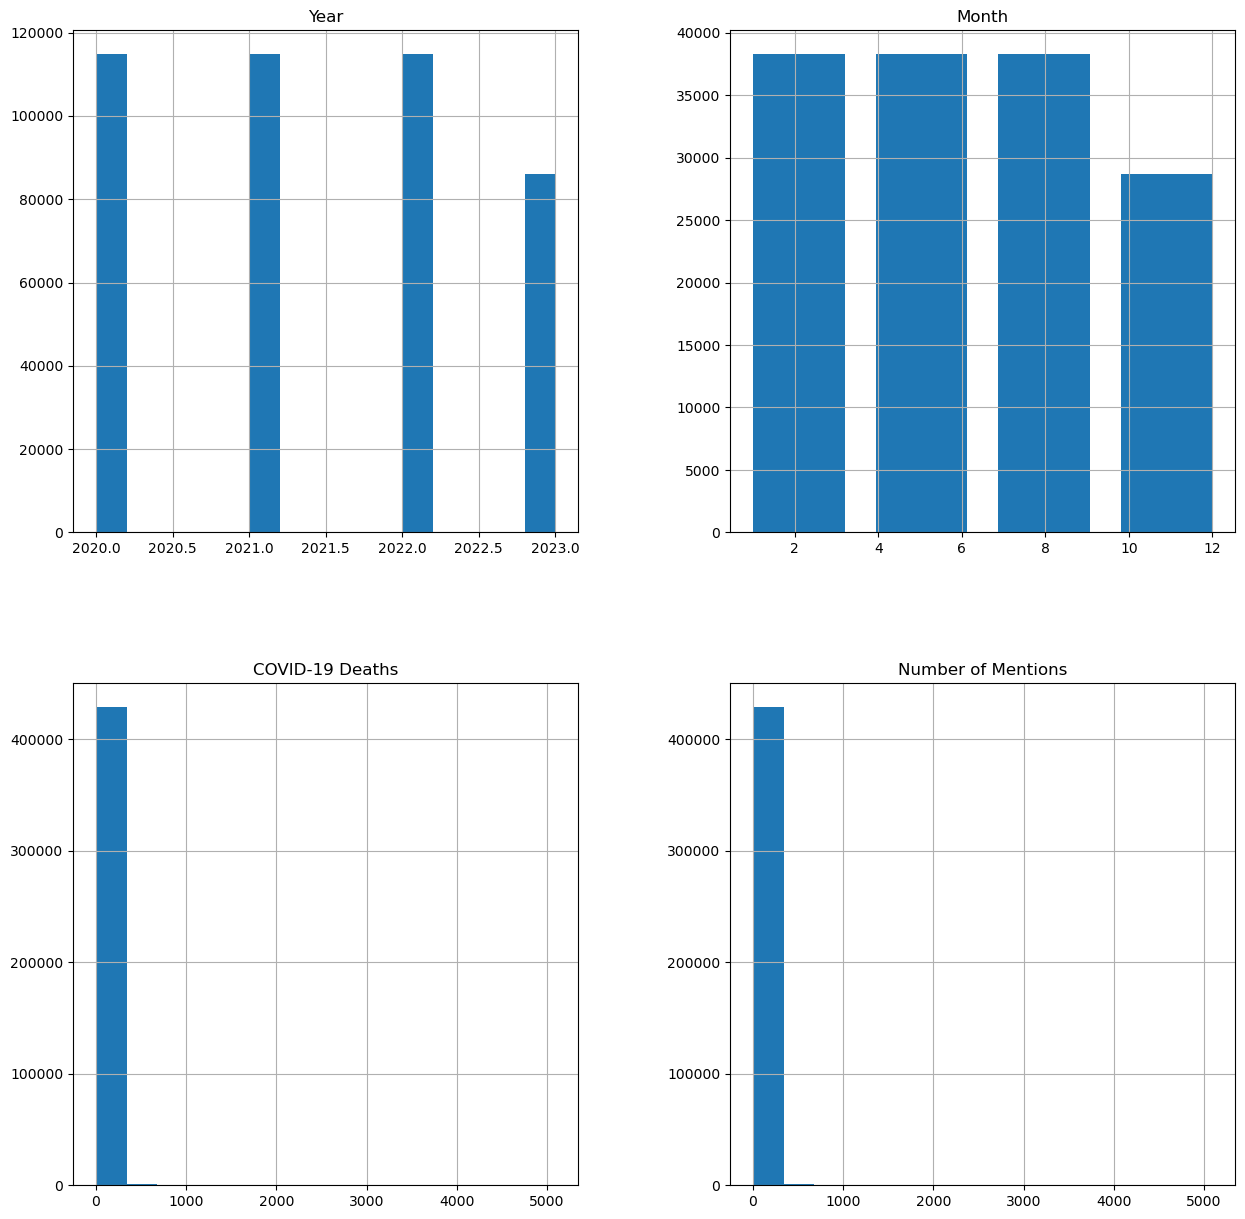

In [38]:
#Plotting a histogram for all numeric variables
df_covid_final_cleaned.hist(bins=15,figsize=(15,15))
plt.show()

In [39]:
# Statistical summaries for numerical columns
df_covid_final_cleaned[['Year', 'Month', 'COVID-19 Deaths', 'Number of Mentions']].describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,430560.000000,430560.000000,430560.000000,430560.000000
mean,2021.400000,6.200000,10.914021,11.777564
std,1.083206,3.350626,53.958244,57.090903
min,2020.000000,1.000000,0.000000,0.000000
25%,2020.000000,3.000000,0.000000,0.000000
50%,2021.000000,6.000000,1.000000,1.000000
75%,2022.000000,9.000000,7.000000,8.000000
max,2023.000000,12.000000,5094.000000,5094.000000


#### From the above histograms we can infer that, the data is distributed from 2020 to 2023. In 2023 the data is less compared to other years because data collection ended in September 9. Also in Month column, the data is spanned across 1 to 12. COVID-19 Deaths and Number of Mentions have large number of zero values with median 1. The data is highly skewed towards left.



## 7. Checking for Outliers

In [40]:
# First, define a function to identify outliers in numerical columns according to the IQR
def find_column_outliers_IQR(df, column):
    # Calculate Q1, Q3 and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find indices of outliers
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    
    return df.loc[outlier_indices]

In [41]:
# Check for outliers in Year
year_outliers = find_column_outliers_IQR(df_covid_final_cleaned, 'Year')
year_outliers

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag


In [42]:
# Check for outliers in "Month"
month_outliers = find_column_outliers_IQR(df_covid_final_cleaned, 'Month')
month_outliers

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag


In [43]:
# Check for outliers in "COVID-19 Deaths"
covid_deaths_outliers = find_column_outliers_IQR(df_covid_final_cleaned, 'COVID-19 Deaths')
covid_deaths_outliers

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
72514,09/24/2023,08/01/2021,08/31/2021,2021.0,8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,30.0,31.0,nan
72552,09/24/2023,01/01/2021,01/31/2021,2021.0,1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,18.0,18.0,nan
72559,09/24/2023,08/01/2021,08/31/2021,2021.0,8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,50.0,50.0,nan
72560,09/24/2023,09/01/2021,09/30/2021,2021.0,9.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,53.0,56.0,nan
72561,09/24/2023,10/01/2021,10/31/2021,2021.0,10.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,23.0,26.0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610534,09/24/2023,08/01/2021,08/31/2021,2021.0,8.0,Wyoming,COVID-19,COVID-19,U071,85+,20.0,20.0,nan
610535,09/24/2023,09/01/2021,09/30/2021,2021.0,9.0,Wyoming,COVID-19,COVID-19,U071,85+,32.0,32.0,nan
610536,09/24/2023,10/01/2021,10/31/2021,2021.0,10.0,Wyoming,COVID-19,COVID-19,U071,85+,47.0,47.0,nan
610537,09/24/2023,11/01/2021,11/30/2021,2021.0,11.0,Wyoming,COVID-19,COVID-19,U071,85+,28.0,28.0,nan


#### Here there are significant number of outliers. But the value appears to be reasonable.So retaining it in the dataframe

In [44]:
# Check for outliers in "Number of Mentions"
mentions_outliers = find_column_outliers_IQR(df_covid_final_cleaned, 'Number of Mentions')
mentions_outliers

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
72514,09/24/2023,08/01/2021,08/31/2021,2021.0,8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,30.0,31.0,nan
72559,09/24/2023,08/01/2021,08/31/2021,2021.0,8.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,50.0,50.0,nan
72560,09/24/2023,09/01/2021,09/30/2021,2021.0,9.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,53.0,56.0,nan
72561,09/24/2023,10/01/2021,10/31/2021,2021.0,10.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,23.0,26.0,nan
72596,09/24/2023,12/01/2020,12/31/2020,2020.0,12.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,29.0,29.0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610527,09/24/2023,01/01/2021,01/31/2021,2021.0,1.0,Wyoming,COVID-19,COVID-19,U071,85+,33.0,33.0,nan
610535,09/24/2023,09/01/2021,09/30/2021,2021.0,9.0,Wyoming,COVID-19,COVID-19,U071,85+,32.0,32.0,nan
610536,09/24/2023,10/01/2021,10/31/2021,2021.0,10.0,Wyoming,COVID-19,COVID-19,U071,85+,47.0,47.0,nan
610537,09/24/2023,11/01/2021,11/30/2021,2021.0,11.0,Wyoming,COVID-19,COVID-19,U071,85+,28.0,28.0,nan


### Here also there are significant number of outliers. But the value appears to be reasonable.So retaining it in the dataframe

## Checking the cleaned dataset again before exporting

In [45]:
# checking dataset#s info, head and shape
print(df_covid_final_cleaned.info())
print(df_covid_final_cleaned.head())
df_covid_final_cleaned.shape

<class 'pandas.core.frame.DataFrame'>
Index: 430560 entries, 72450 to 610559
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          430560 non-null  object 
 1   Start Date          430560 non-null  object 
 2   End Date            430560 non-null  object 
 3   Year                430560 non-null  float64
 4   Month               430560 non-null  float64
 5   State               430560 non-null  object 
 6   Condition Group     430560 non-null  object 
 7   Condition           430560 non-null  object 
 8   ICD10_codes         430560 non-null  object 
 9   Age Group           430560 non-null  object 
 10  COVID-19 Deaths     430560 non-null  float64
 11  Number of Mentions  430560 non-null  float64
 12  Flag                430560 non-null  object 
dtypes: float64(4), object(9)
memory usage: 62.1+ MB
None
       Data As Of  Start Date    End Date    Year  Month    State  \
72450  09/24/

(430560, 13)

In [46]:
# checking the statistics of the dataset
df_covid_final_cleaned.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,430560.000000,430560.000000,430560.000000,430560.000000
mean,2021.400000,6.200000,10.914021,11.777564
std,1.083206,3.350626,53.958244,57.090903
min,2020.000000,1.000000,0.000000,0.000000
25%,2020.000000,3.000000,0.000000,0.000000
50%,2021.000000,6.000000,1.000000,1.000000
75%,2022.000000,9.000000,7.000000,8.000000
max,2023.000000,12.000000,5094.000000,5094.000000


In [47]:
print(df_covid_final_cleaned['State'].value_counts(dropna = False))
print(df_covid_final_cleaned['Condition Group'].value_counts(dropna = False))
print(df_covid_final_cleaned['Condition'].value_counts(dropna = False))
print(df_covid_final_cleaned['ICD10_codes'].value_counts(dropna = False))
print(df_covid_final_cleaned['Age Group'].value_counts(dropna = False))
print(df_covid_final_cleaned['Flag'].value_counts(dropna = False))

State
Alabama                 8280
Alaska                  8280
Nevada                  8280
New Hampshire           8280
New Jersey              8280
New Mexico              8280
New York                8280
New York City           8280
North Carolina          8280
North Dakota            8280
Ohio                    8280
Oklahoma                8280
Oregon                  8280
Pennsylvania            8280
Rhode Island            8280
South Carolina          8280
South Dakota            8280
Tennessee               8280
Texas                   8280
Utah                    8280
Vermont                 8280
Virginia                8280
Washington              8280
West Virginia           8280
Wisconsin               8280
Nebraska                8280
Montana                 8280
Missouri                8280
Idaho                   8280
Arizona                 8280
Arkansas                8280
California              8280
Colorado                8280
Connecticut             8280
Delaware

## 8. Exporting the dataset

In [48]:
# Export the "df_covid_final_cleaned" dataframe to CSV
df_covid_final_cleaned.to_csv(os.path.join(path, 'Project','Data','Prepared Data', 'Cleaned_Conditions_Contributing_to_COVID-19_Deaths_by_State_and_Age_Provisional_2020-2023.csv'), index=False)